In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv
/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
pd.set_option("display.max_columns", None)
print("Shape of the dataset is : ", data.shape)
data.head()

Shape of the dataset is :  (103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

## Removing Nulls

In [5]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

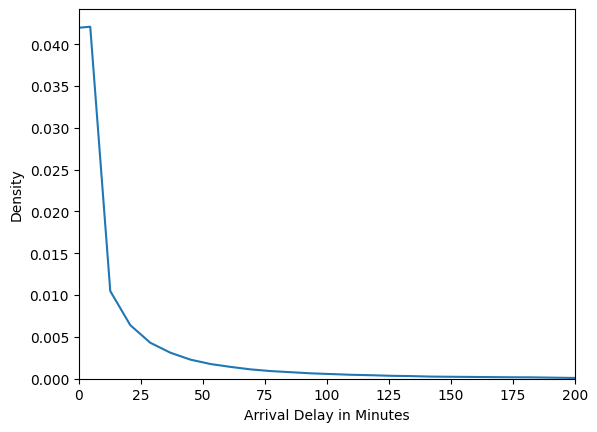

Mean of Arrival Delay in Minutes is :  15.178678301832152


In [6]:
# Displaying nulls in plot

sns.kdeplot(data= data, x='Arrival Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.xlim([0 , 200])
plt.show()

print("Mean of Arrival Delay in Minutes is : ", np.mean(data['Arrival Delay in Minutes']))

In [7]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())
print("Nulls in Arrival Delay in Minutes are : ", data['Arrival Delay in Minutes'].isnull().sum())

Nulls in Arrival Delay in Minutes are :  0


## Encoding Target Variable

In [8]:
# Encoding Target Values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['satisfaction'] = le.fit_transform(data['satisfaction'])

In [9]:
cat_col = data.select_dtypes(include=['object']).columns
int_col = data.select_dtypes(include=['int64', 'float64']).columns

## Encoding Categorical Variables

In [10]:
print("Categorical Columns are : ")
print(cat_col)
print()
print("Integer Columns are : ")
print(int_col)

Categorical Columns are : 
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

Integer Columns are : 
Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [11]:
for i in cat_col:
    print(f"Unique Values in [{i}] are {data[i].unique()}")
    print()

Unique Values in [Gender] are ['Male' 'Female']

Unique Values in [Customer Type] are ['Loyal Customer' 'disloyal Customer']

Unique Values in [Type of Travel] are ['Personal Travel' 'Business travel']

Unique Values in [Class] are ['Eco Plus' 'Business' 'Eco']



In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded_cols = ohe.fit_transform(data[cat_col])
encoded_name = ohe.get_feature_names_out(cat_col)
encoded_df = pd.DataFrame(encoded_cols, columns = encoded_name, index = data.index )

encoded_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1.0,0.0,1.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [13]:
data = data.drop(columns=cat_col)
data = pd.concat([data, encoded_df], axis=1)
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1.0,0.0,1.0,0.0,1.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1.0,1.0,0.0,0.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0.0,0.0,0.0,0.0,0.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1.0,0.0,0.0,0.0,0.0


## Spliting the Dataset

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop(['satisfaction'], axis=1)
Y = data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Scaling Values

In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Model Creation

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

acc_lr = accuracy_score(y_pred_lr, y_test)
print("Accuracy score is : ", acc_lr*100)

recal_lr = recall_score(y_pred_lr, y_test)
print("Accuracy score is : ", recal_lr)

pre_lr = precision_score(y_pred_lr, y_test)
print("Accuracy score is : ", pre_lr)

Accuracy score is :  87.65218228189211
Accuracy score is :  0.8733348644924208
Accuracy score is :  0.8386634318482576


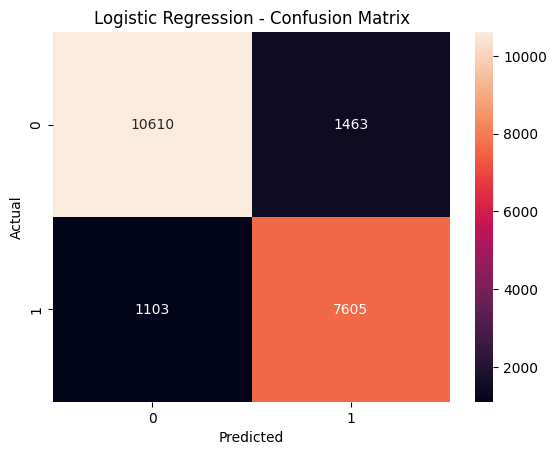

In [18]:
cm_lr = confusion_matrix(y_pred_lr, y_test)
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [20]:
acc_dt = accuracy_score(y_pred_dt, y_test)
print("Accuracy score is : ", acc_dt*100)

recal_dt = recall_score(y_pred_dt, y_test)
print("Accuracy score is : ", recal_dt)

pre_dt = precision_score(y_pred_dt, y_test)
print("Accuracy score is : ", pre_dt)

Accuracy score is :  94.51421971993648
Accuracy score is :  0.9341730558598028
Accuracy score is :  0.9405602117335686


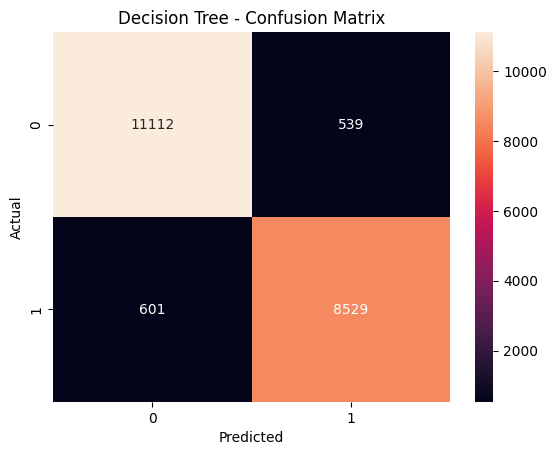

In [21]:
cm_dt = confusion_matrix(y_pred_dt, y_test)
sns.heatmap(cm_dt, annot=True, fmt='d', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

`Decision Tree` must be selected as it has higher accuracy and missclassifies fewer data points that `Logistic Regression`. 